In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.utils.tensorboard import SummaryWriter

# Discriminator

In [ ]:
class Discriminator(nn.Module):
  def __init__(self, img_dim):
    super().__init__()
    self.discriminator = nn.Sequential(
        nn.Linear(img_dim, 128),
        nn.LeakyReLU(0.1),
        nn.Linear(128,1),
        nn.Sigmoid(),
    )

  def forward(self, x):
    return self.discriminator(x)

# Generator

In [ ]:
class Generator(nn.Module):
  def __init__(self, z_dim, img_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.LeakyReLU(0.1),
        nn.Linear(256, img_dim),
        nn.Tanh(),
    )

  def forward(self,x):
    return self.gen(x)

# Hyperparameters

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lr = 3e-4
z_dim = 64
img_dim = 28*28*1 # 784
batch_size = 32
num_epochs = 50

In [ ]:
discriminator = Discriminator(img_dim).to(device)
generator = Generator(z_dim, img_dim).to(device)

In [ ]:
fixed_noise = torch.randn((batch_size, z_dim)).to(device)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)), # 0.1307 mean and 0.3081 std for mnist dataset
])

# Dataset

In [ ]:
dataset = datasets.MNIST(root='/dataset', transform=transform, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Loss and Optimizer



In [ ]:
gen_optim = optim.Adam(generator.parameters(), lr=lr)
disc_optim = optim.Adam(discriminator.parameters(), lr=lr)

criterion = nn.BCELoss()

In [ ]:
writer_fake = SummaryWriter(f"runs/GAN_MNIST/fake")
writer_real = SummaryWriter(f"runs/GAN_MNIST/real")
step=0

# **GAN TRAINING**

Epoch [0/50] Batch 0/1875                 Loss D: 0.3487, Loss G: 1.9272


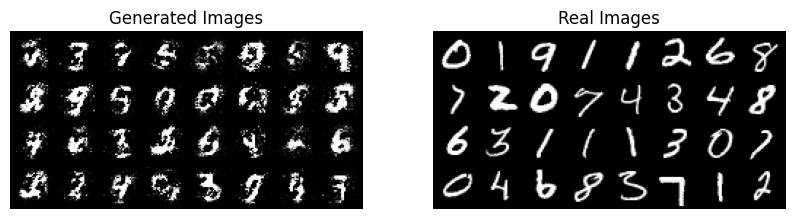

Epoch [1/50] Batch 0/1875                 Loss D: 0.5265, Loss G: 1.6645


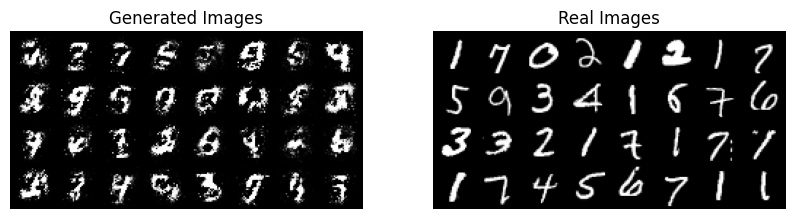

Epoch [2/50] Batch 0/1875                 Loss D: 0.4270, Loss G: 1.8512


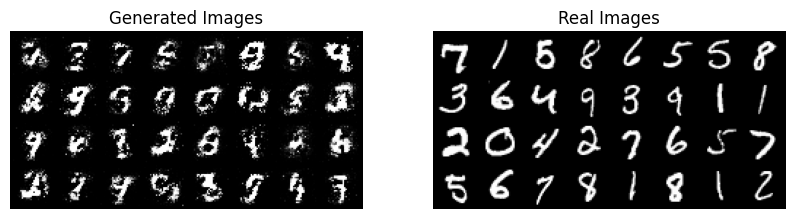

Epoch [3/50] Batch 0/1875                 Loss D: 0.3935, Loss G: 2.0410


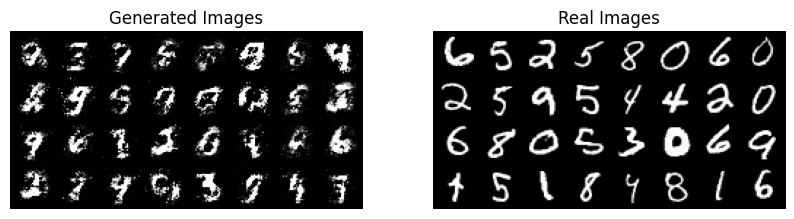

Epoch [4/50] Batch 0/1875                 Loss D: 0.4455, Loss G: 1.8485


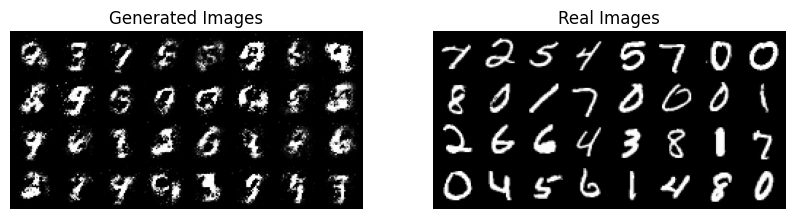

Epoch [5/50] Batch 0/1875                 Loss D: 0.4923, Loss G: 1.6716


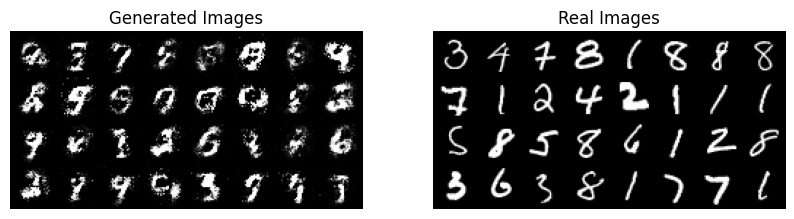

Epoch [6/50] Batch 0/1875                 Loss D: 0.5354, Loss G: 1.7365


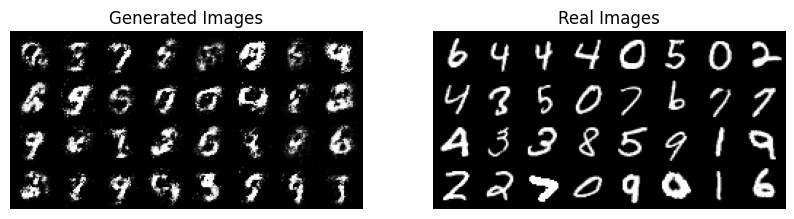

Epoch [7/50] Batch 0/1875                 Loss D: 0.3696, Loss G: 2.8003


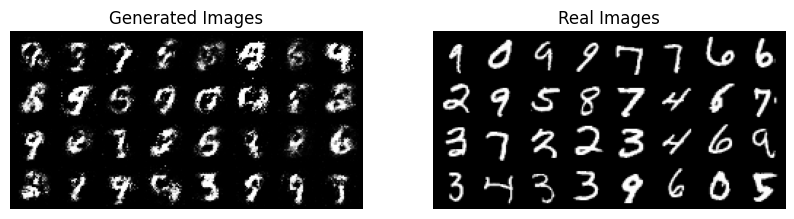

Epoch [8/50] Batch 0/1875                 Loss D: 0.5464, Loss G: 1.4766


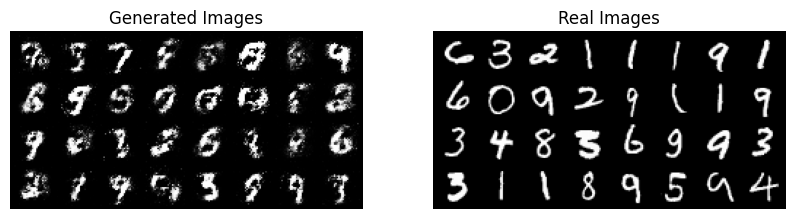

Epoch [9/50] Batch 0/1875                 Loss D: 0.4950, Loss G: 2.5435


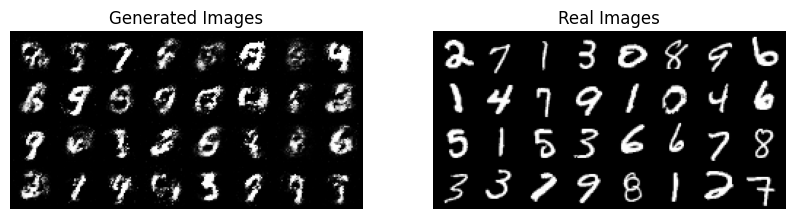

Epoch [10/50] Batch 0/1875                 Loss D: 0.5343, Loss G: 2.1708


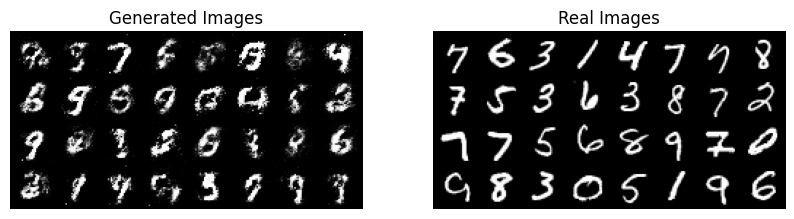

Epoch [11/50] Batch 0/1875                 Loss D: 0.6026, Loss G: 1.5568


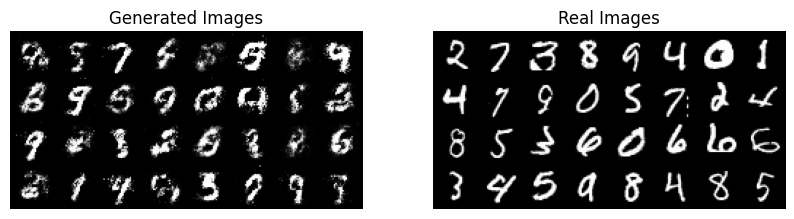

Epoch [12/50] Batch 0/1875                 Loss D: 0.5238, Loss G: 1.9099


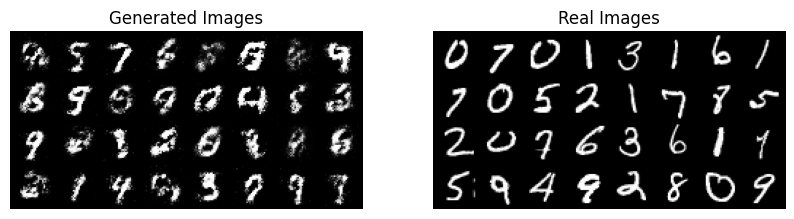

Epoch [13/50] Batch 0/1875                 Loss D: 0.5323, Loss G: 2.1417


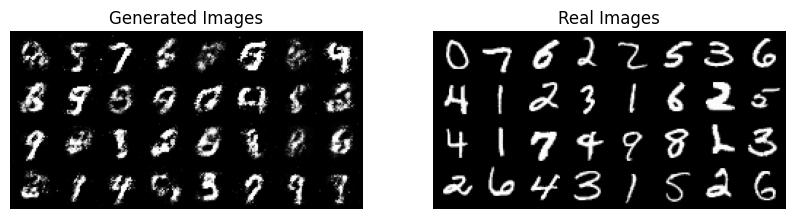

Epoch [14/50] Batch 0/1875                 Loss D: 0.5326, Loss G: 1.3661


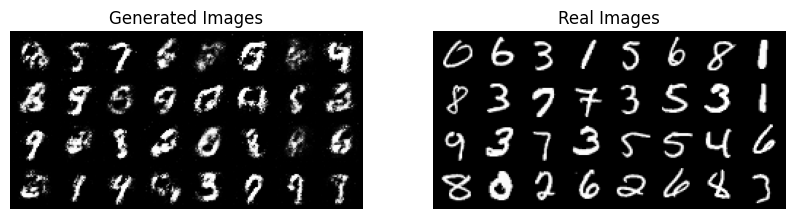

Epoch [15/50] Batch 0/1875                 Loss D: 0.4917, Loss G: 1.5194


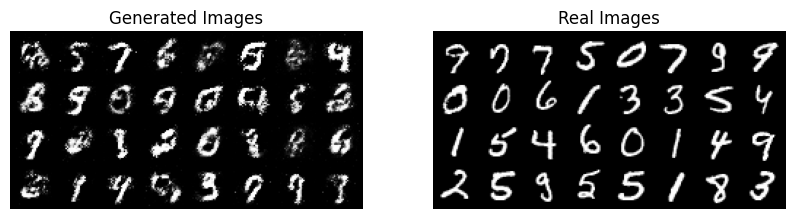

Epoch [16/50] Batch 0/1875                 Loss D: 0.6399, Loss G: 1.7160


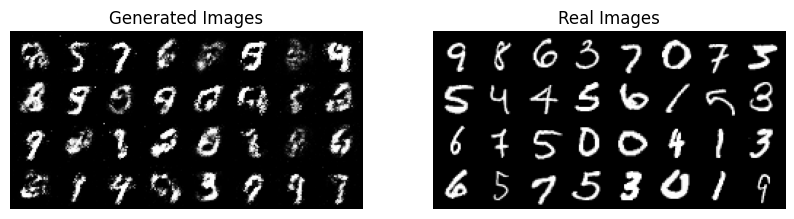

Epoch [17/50] Batch 0/1875                 Loss D: 0.6469, Loss G: 1.6888


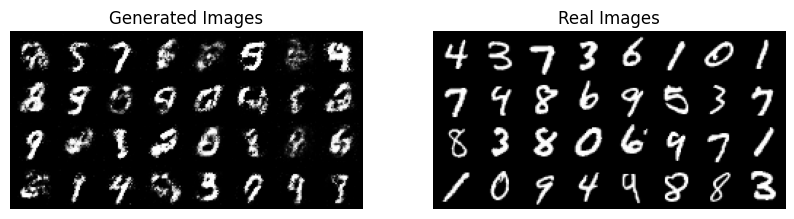

Epoch [18/50] Batch 0/1875                 Loss D: 0.7306, Loss G: 0.7945


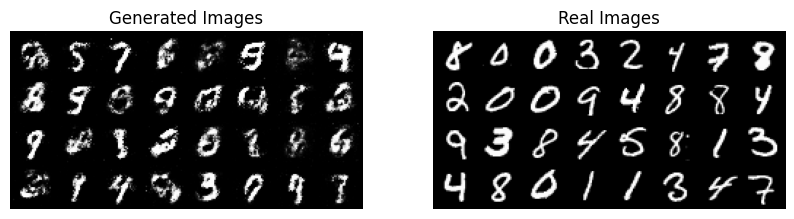

Epoch [19/50] Batch 0/1875                 Loss D: 0.5275, Loss G: 1.3341


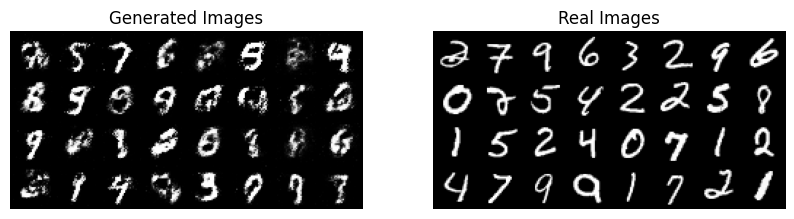

Epoch [20/50] Batch 0/1875                 Loss D: 0.4929, Loss G: 1.4438


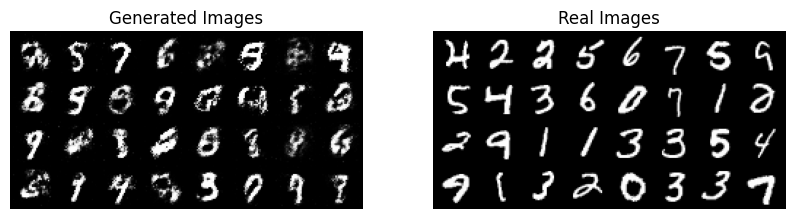

Epoch [21/50] Batch 0/1875                 Loss D: 0.6197, Loss G: 1.0266


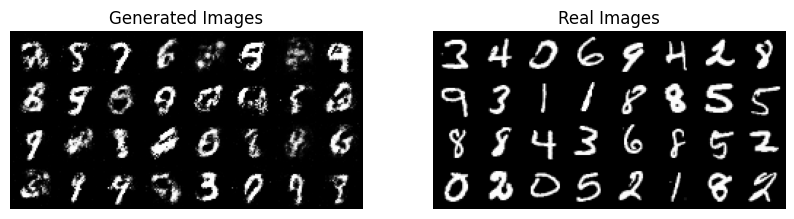

Epoch [22/50] Batch 0/1875                 Loss D: 0.6046, Loss G: 0.8940


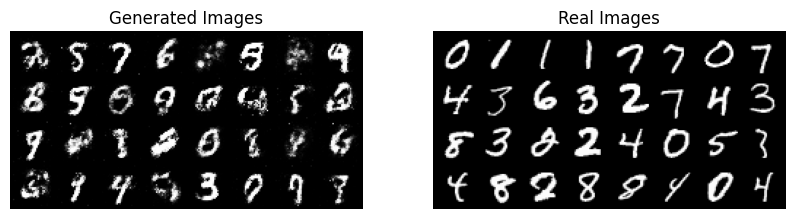

Epoch [23/50] Batch 0/1875                 Loss D: 0.5134, Loss G: 1.7072


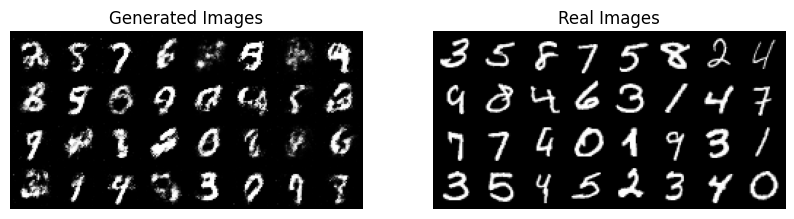

Epoch [24/50] Batch 0/1875                 Loss D: 0.5645, Loss G: 1.8318


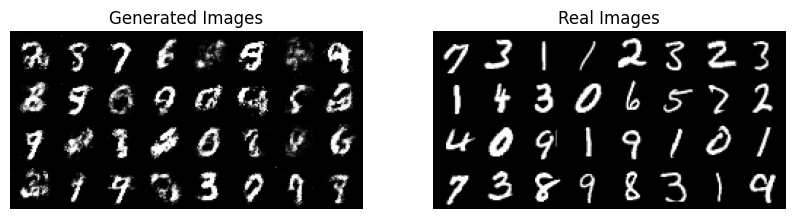

Epoch [25/50] Batch 0/1875                 Loss D: 0.3776, Loss G: 1.9493


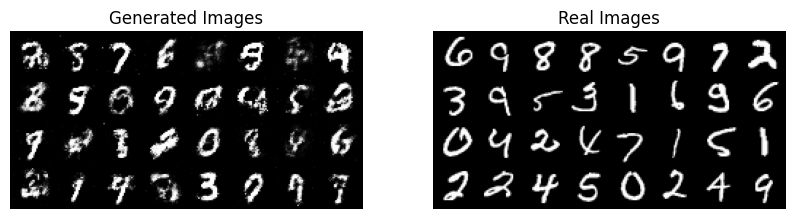

Epoch [26/50] Batch 0/1875                 Loss D: 0.5746, Loss G: 1.5221


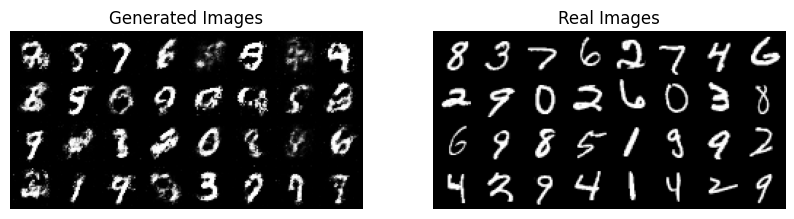

Epoch [27/50] Batch 0/1875                 Loss D: 0.5166, Loss G: 1.6949


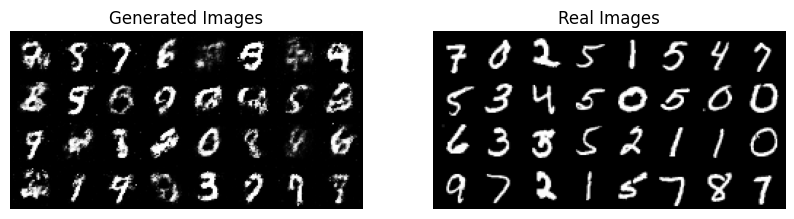

Epoch [28/50] Batch 0/1875                 Loss D: 0.6318, Loss G: 0.8294


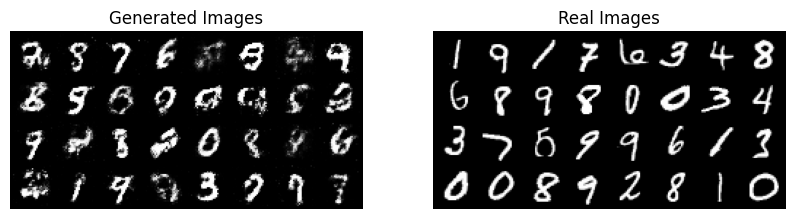

Epoch [29/50] Batch 0/1875                 Loss D: 0.6270, Loss G: 1.2082


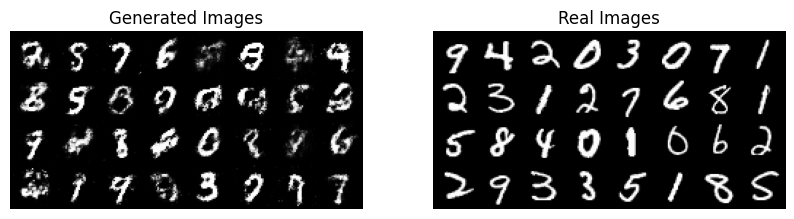

Epoch [30/50] Batch 0/1875                 Loss D: 0.5657, Loss G: 1.9534


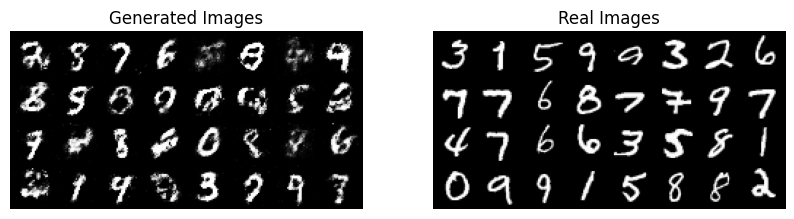

Epoch [31/50] Batch 0/1875                 Loss D: 0.5517, Loss G: 1.5147


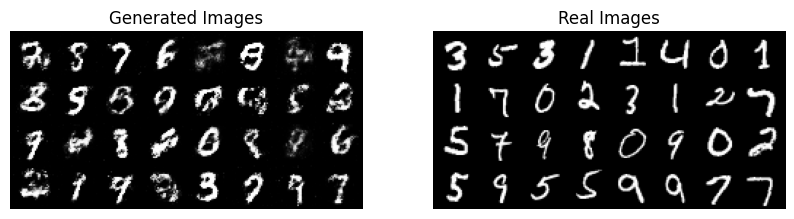

Epoch [32/50] Batch 0/1875                 Loss D: 0.5304, Loss G: 1.2778


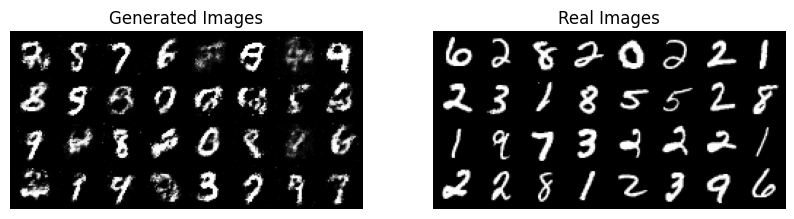

Epoch [33/50] Batch 0/1875                 Loss D: 0.4906, Loss G: 1.7010


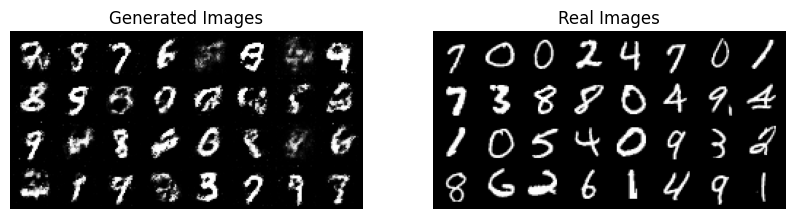

Epoch [34/50] Batch 0/1875                 Loss D: 0.6270, Loss G: 1.8650


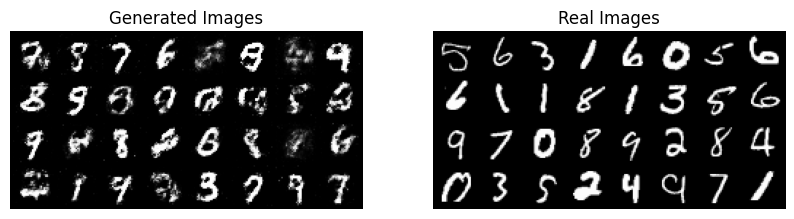

Epoch [35/50] Batch 0/1875                 Loss D: 0.3985, Loss G: 1.9798


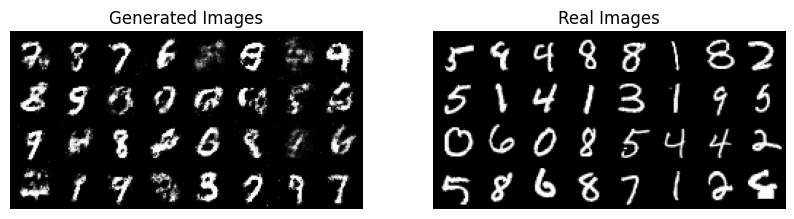

Epoch [36/50] Batch 0/1875                 Loss D: 0.5466, Loss G: 1.4253


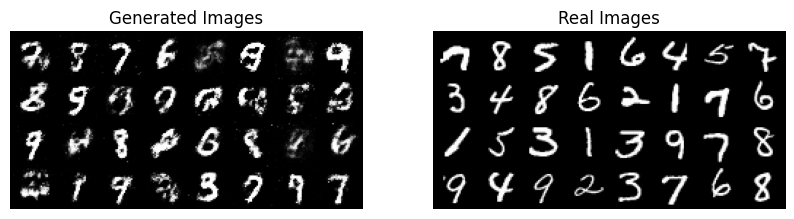

Epoch [37/50] Batch 0/1875                 Loss D: 0.5749, Loss G: 1.0941


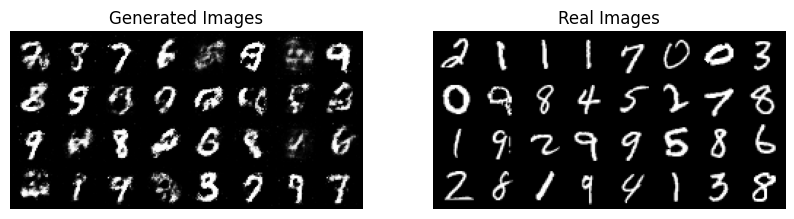

Epoch [38/50] Batch 0/1875                 Loss D: 0.5716, Loss G: 1.2447


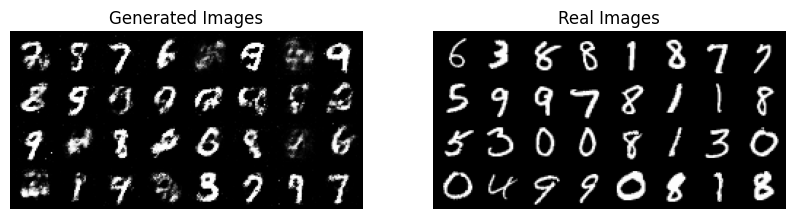

Epoch [39/50] Batch 0/1875                 Loss D: 0.5278, Loss G: 1.7356


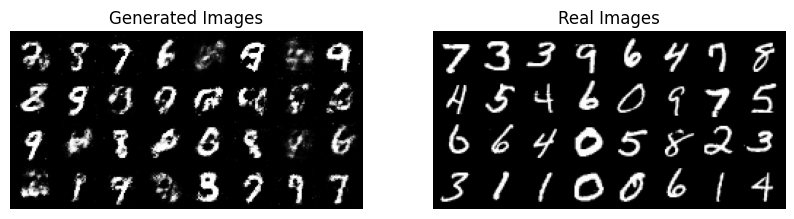

Epoch [40/50] Batch 0/1875                 Loss D: 0.5392, Loss G: 1.6208


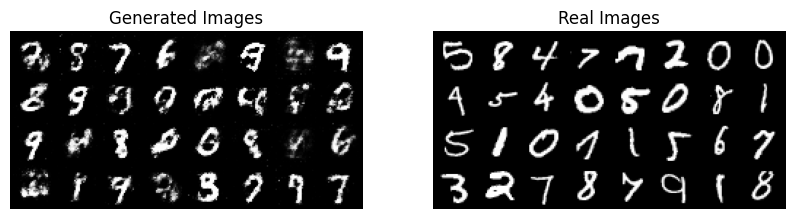

Epoch [41/50] Batch 0/1875                 Loss D: 0.4089, Loss G: 1.6419


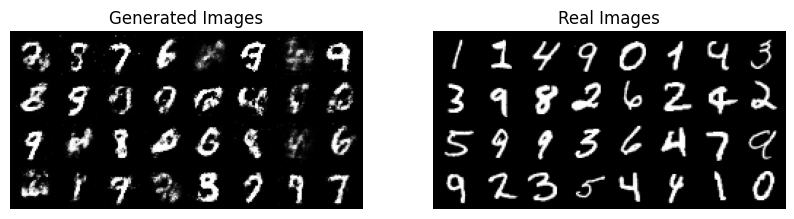

Epoch [42/50] Batch 0/1875                 Loss D: 0.4233, Loss G: 1.2757


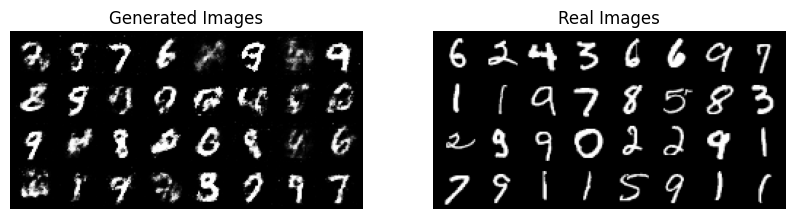

Epoch [43/50] Batch 0/1875                 Loss D: 0.5537, Loss G: 1.2788


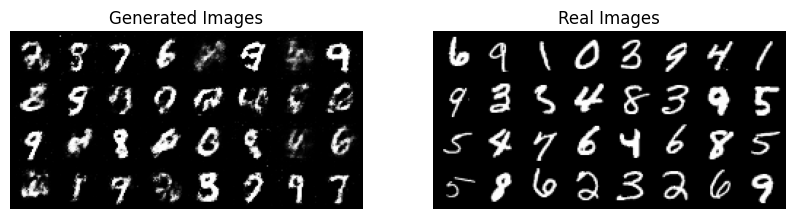

Epoch [44/50] Batch 0/1875                 Loss D: 0.5379, Loss G: 1.1898


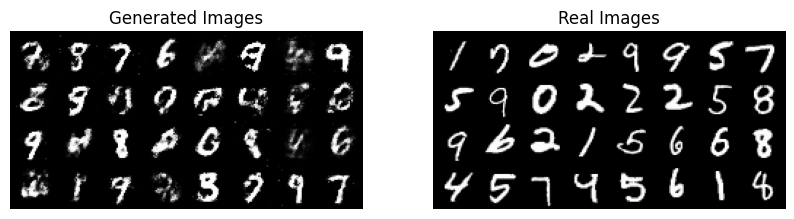

Epoch [45/50] Batch 0/1875                 Loss D: 0.4691, Loss G: 1.5139


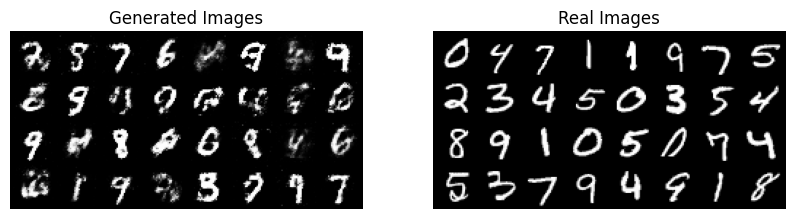

Epoch [46/50] Batch 0/1875                 Loss D: 0.5236, Loss G: 1.5008


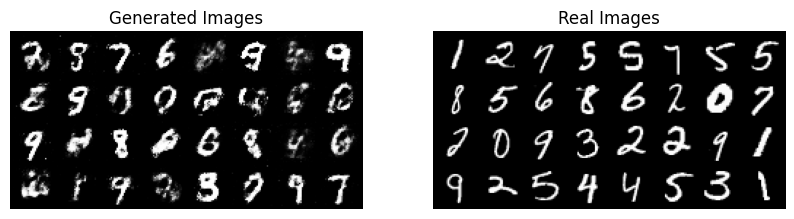

Epoch [47/50] Batch 0/1875                 Loss D: 0.6837, Loss G: 1.0236


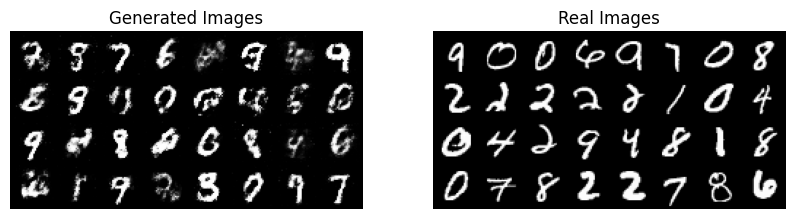

Epoch [48/50] Batch 0/1875                 Loss D: 0.4759, Loss G: 1.4235


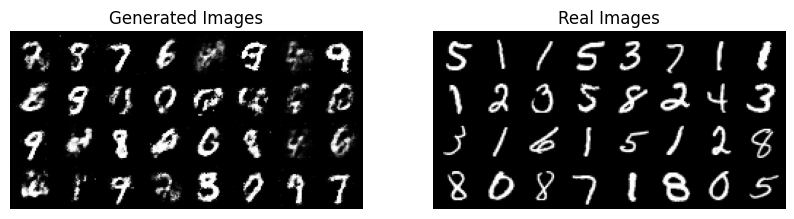

Epoch [49/50] Batch 0/1875                 Loss D: 0.6197, Loss G: 1.2438


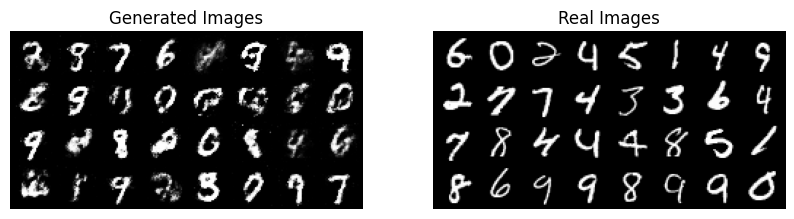

In [ ]:
import matplotlib.pyplot as plt

for epoch in range(num_epochs):

  for batch_idx, (real, _) in enumerate(loader):
    real = real.view(-1,784).to(device) # -1 -> keep no. of data same, and make each data of size 784
    batch_size = real.shape[0]

    # Train DISCRIMINATOR (max (log(D(real)) + log(1-D(G(z))) )
    noise = torch.randn(batch_size, z_dim).to(device)
    fake = generator(noise)

    disc_real = discriminator(real).view(-1)
    lossD_real = criterion(disc_real,torch.ones_like(disc_real) )
    disc_fake = discriminator(fake).view(-1)
    lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
    lossD = (lossD_real + lossD_fake)/2

    discriminator.zero_grad()
    lossD.backward(retain_graph=True) # to not clear graph after backpropagation immediately, helps us to utilize fake (noise) again
    disc_optim.step()

    ## Train GENERATOR (min log(1-D(G(z))) <-> max log(D(G(z))) )
    output = discriminator(fake).view(-1)
    lossG = criterion(output,torch.ones_like(output) )
    generator.zero_grad()
    lossG.backward()
    gen_optim.step()

    # if batch_idx == 0:
    #         print(
    #             f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
    #                   Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
    #         )

    #         with torch.no_grad():
    #             fake = generator(fixed_noise).reshape(-1, 1, 28, 28)
    #             data = real.reshape(-1, 1, 28, 28)
    #             img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
    #             img_grid_real = torchvision.utils.make_grid(data, normalize=True)

    #             writer_fake.add_image(
    #                 "Mnist Fake Images", img_grid_fake, global_step=step
    #             )
    #             writer_real.add_image(
    #                 "Mnist Real Images", img_grid_real, global_step=step
    #             )
    #             step += 1

    if batch_idx == 0:
       print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
                Loss D: {lossD:.4f}, Loss G: {lossG:.4f}"
            )
       fig, axes = plt.subplots(1, 2, figsize=(10, 5))

       with torch.no_grad():
          fake = generator(fixed_noise).reshape(-1, 1, 28, 28).cpu()  # Move to CPU
          data = real.reshape(-1, 1, 28, 28).cpu()  # Move to CPU

          # Visualize fake images
          img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
          axes[0].imshow(img_grid_fake.permute(1, 2, 0), cmap='gray')  # Adjust permute for channel order
          axes[0].set_title('Generated Images')
          axes[0].axis('off')

          # Visualize real images
          img_grid_real = torchvision.utils.make_grid(data, normalize=True)
          axes[1].imshow(img_grid_real.permute(1, 2, 0), cmap='gray')  # Adjust permute for channel order
          axes[1].set_title('Real Images')
          axes[1].axis('off')

          plt.show()

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir="/content/runs"

In [ ]:
# !kill 30712

In [ ]:
# !lsof -i :6007

In [ ]:
# !kill -9 29173

In [ ]:
# !tensorboard dev upload \
#   --logdir "/content/runs" \
#   --name "Simple GAN" \
#   --description "Trying to visualize outputs" \
#   --one_shot